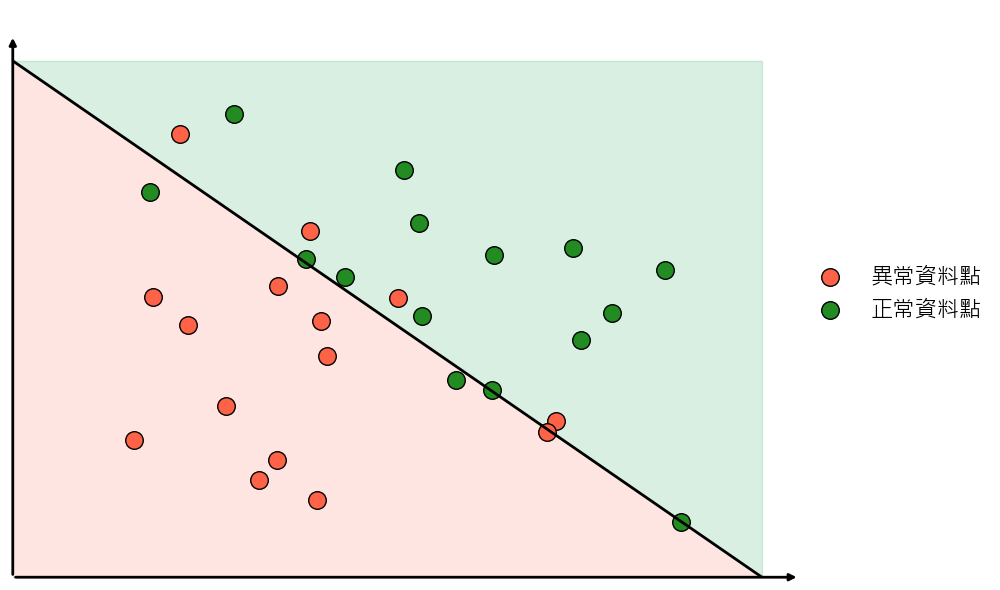

In [50]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Microsoft JhengHei'
# ------------------------------------------------------------
# 1. Toy data –‑ x = Income, y = Employment Duration
# ------------------------------------------------------------

# ------------------------------------------------------------------
# 1. Helper to generate N points that satisfy an arbitrary condition
# ------------------------------------------------------------------
def sample_points(cond, n, xlim=(1, 9), ylim=(1, 9), rng=None):
    """
    Rejection‑samples points until `n` of them satisfy `cond(x, y)`.
      cond  : function (vectorized) returning bool mask for x, y
      n     : number of accepted points to return
      xlim  : (xmin, xmax)
      ylim  : (ymin, ymax)
      rng   : np.random.Generator (optional)
    """
    if rng is None:
        rng = np.random.default_rng()
    accepted_x, accepted_y = [], []
    while len(accepted_x) < n:
        x_trial = rng.uniform(*xlim, size=n)    # draw a batch at once
        y_trial = rng.uniform(*ylim, size=n)
        mask    = cond(x_trial, y_trial)
        accepted_x.extend(x_trial[mask])
        accepted_y.extend(y_trial[mask])
    return np.column_stack([accepted_x[:n], accepted_y[:n]])

# ------------------------------------------------------------------
# 2. Define your two region constraints
# ------------------------------------------------------------------
cond_green   = lambda x, y: y > -x + 9      # region ABOVE  y = -x + 9
cond_red = lambda x, y: y < -x + 11       # region BELOW  y =  x + 11

# ------------------------------------------------------------------
# 3. Generate data
# ------------------------------------------------------------------
rng = np.random.default_rng(seed=2025)
red_pts   = sample_points(cond_red,   n=15, rng=rng)
green_pts = sample_points(cond_green, n=15,  rng=rng)
# ------------------------------------------------------------
# 2. Prepare the canvas
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))

# Decision boundary: y = −x + b
x_vals = np.linspace(0, 10, 200)
b = 10                           # vertical intercept — adjust to taste
boundary = -x_vals + b

# Shade the two half‑planes
ax.fill_between(x_vals, boundary, 10,  color='mediumseagreen', alpha=0.2)
ax.fill_between(x_vals, 0,        boundary, color='salmon',       alpha=0.2)

# Plot the decision line
ax.plot(x_vals, boundary, color='black', linewidth=2)

# ------------------------------------------------------------
# 3. Scatter the data points
# ------------------------------------------------------------
ax.scatter(red_pts[:, 0], red_pts[:, 1],
           s=160, color='tomato',  edgecolor='black', label='異常資料點')
ax.scatter(green_pts[:, 0],   green_pts[:, 1],
           s=160, color='forestgreen', edgecolor='black', label="正常資料點")

# ------------------------------------------------------------
# 4. Fancy axes with arrow heads
# ------------------------------------------------------------
ax.set_xlim(0, 11)
ax.set_ylim(0, 11)

# Hide the normal spines
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Draw custom arrowed axes
arrow_props = dict(arrowstyle='-|>', linewidth=2, color='black')
ax.annotate('', xy=(10.5, 0), xytext=(0, 0), arrowprops=arrow_props)
ax.annotate('', xy=(0, 10.5), xytext=(0, 0), arrowprops=arrow_props)

# Ticks off
ax.set_xticks([])
ax.set_yticks([])


# Legend
ax.legend(frameon=False, fontsize=16, loc='center right', bbox_to_anchor=(1.2, 0.5))

plt.tight_layout()
plt.show()


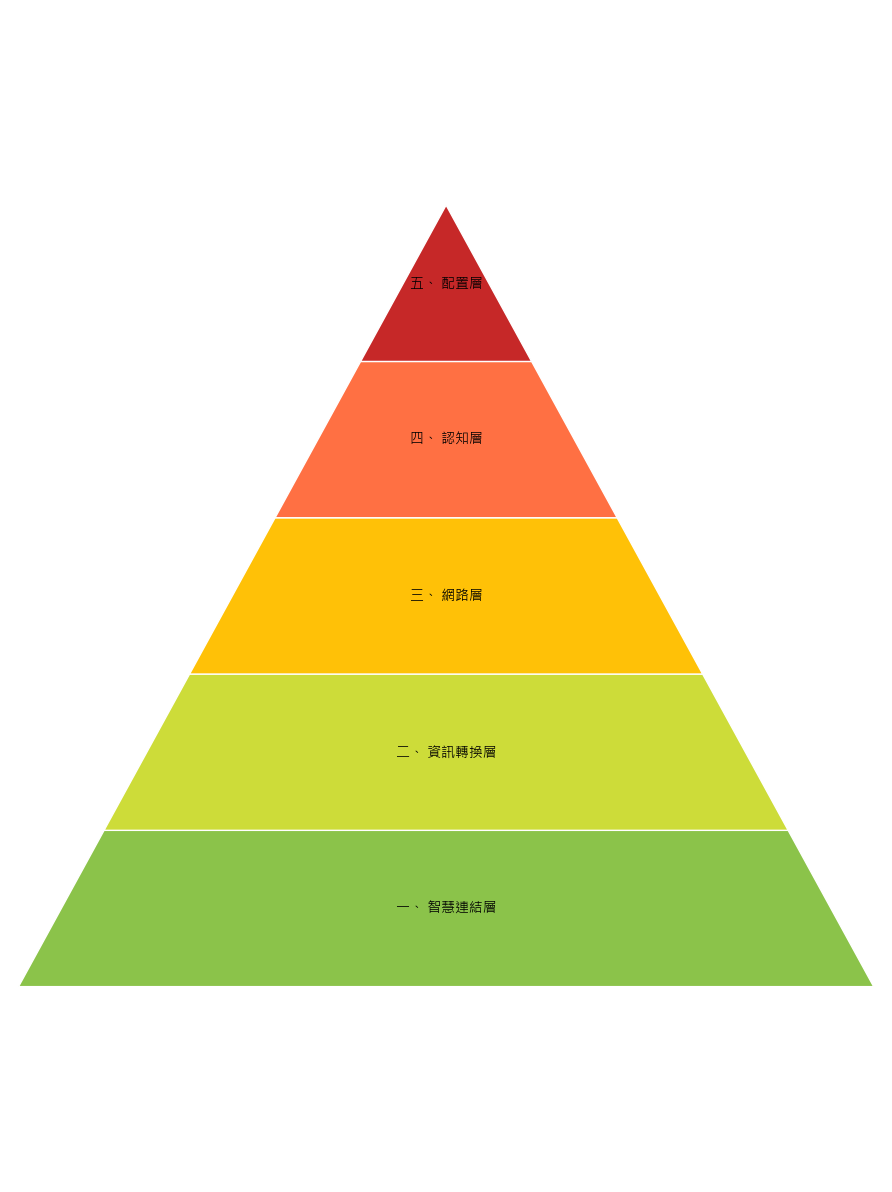

In [52]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib

# ───────────────────────────────────────────────────────────
# 1.  basic geometry
# ───────────────────────────────────────────────────────────
height    = 2        # pyramid height (y‑axis)
half_base = 25    # half of the base width (x‑axis).  tweak this freely

n_levels  = 5        # 5‑C architecture → five horizontal slices
y_levels  = [height * i / n_levels for i in range(n_levels + 1)]

# ───────────────────────────────────────────────────────────
# 2.  labels & colours  (bottom → top)
# ───────────────────────────────────────────────────────────
labels  = [
    "一、 智慧連結層",
    "二、 資訊轉換層",
    "三、 網路層",
    "四、 認知層",
    "五、 配置層",
]
colours = ["#8BC34A", "#CDDC39", "#FFC107", "#FF7043", "#C62828"]

# If you run on Windows and have 微軟正黑體 installed, uncomment:
# matplotlib.rcParams["font.family"] = "Microsoft JhengHei"

# ───────────────────────────────────────────────────────────
# 3.  helper: x‑coordinate on the side edge at a given y
#     (linear interpolation between apex (0, height) and base (±half_base, 0))
# ───────────────────────────────────────────────────────────
def side_x(y: float) -> float:
    return (height - y) * half_base / height

# ───────────────────────────────────────────────────────────
# 4.  plotting
# ───────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(9, 12))

for i in range(n_levels):
    y0, y1 = y_levels[i], y_levels[i + 1]

    x_left0,  x_right0  = -side_x(y0),  side_x(y0)
    x_left1,  x_right1  = -side_x(y1),  side_x(y1)

    # top slice is a triangle, others are trapezoids
    if i == n_levels - 1:
        verts = [(x_left0, y0), (x_right0, y0), (0, y1)]
    else:
        verts = [(x_left0, y0), (x_right0, y0), (x_right1, y1), (x_left1, y1)]

    ax.add_patch(Polygon(verts, closed=True,
                         facecolor=colours[i], edgecolor="white"))

    # put label in the centre of the slice
    cy = (y0 + y1) / 2
    ax.text(0, cy, labels[i], ha="center", va="center", fontsize=10, wrap=True)

# ───────────────────────────────────────────────────────────
# 5.  axis limits & layout
# ───────────────────────────────────────────────────────────
margin = 0.5
ax.set_xlim(-half_base - margin, half_base + margin)
ax.set_ylim(-0.5, height + 0.5)
ax.axis("off")

plt.tight_layout(pad=1.0)   # add a little padding so nothing is clipped
fig.savefig("CPS_5C_pyramid.png", dpi=600, bbox_inches="tight")
plt.show()
